In [1]:
import shutil
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
import tensorflow_probability as tfp
import os 
import sys
import matplotlib.pyplot as plt
import pandas as pd
from pyDOE import lhs
%load_ext autoreload
%autoreload 2
import time

W0308 00:24:19.194220 139907670894336 deprecation.py:323] From /usr/local/lib/python3.5/dist-packages/tensorflow/python/compat/v2_compat.py:63: disable_resource_variables (from tensorflow.python.ops.variable_scope) is deprecated and will be removed in a future version.
Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
tfm = tfp.models

In [3]:
inputs = np.loadtxt('./test_Data/X.txt')

In [4]:
outputs = np.loadtxt('./test_Data/Y.txt')

In [5]:
print(inputs.shape)

(100, 4)


In [6]:
labels = ['u1','u2', 'u3','u4']

In [7]:
model = tfm.BGP_model(inputs, outputs, kernel_type = 'RBF', noise_level = 1e-2, labels = labels)

In [8]:
model_info = model.run_mcmc(mcmc_samples = 8000, num_leapfrog_steps = 3, estimate_noise = False, warm_up = True)

Noise variance is fixed.
Excecuting the warmup.
Warmup: 
Warm-Up Iteration:   0 Acceptance Rate: 1.000
Warm-Up Iteration: 500 Acceptance Rate: 0.587
Warm-Up Iteration: 1000 Acceptance Rate: 0.595
Warm-Up Iteration: 1500 Acceptance Rate: 0.588
Warm-Up Iteration: 2000 Acceptance Rate: 0.586
Warm-Up Iteration: 2500 Acceptance Rate: 0.587
Warm-Up Iteration: 3000 Acceptance Rate: 0.587
Warm-Up Iteration: 3500 Acceptance Rate: 0.585
Warm-Up Iteration: 3999 Acceptance Rate: 0.585
Sampling in progress.


/root/.local/lib/python3.5/site-packages/tensorflow_probability/python/mcmc/sample.py:335: UserWarning: Tracing all kernel results by default is deprecated. Set the `trace_fn` argument to None (the future default value) or an explicit callback that traces the values you are interested in.
  warnings.warn("Tracing all kernel results by default is deprecated. Set "
W0308 00:24:47.977018 139907670894336 deprecation.py:323] From /root/.local/lib/python3.5/site-packages/tensorflow_probability/python/models/bayesgp/scripts/bayesiangp.py:234: to_float (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.cast` instead.


Acceptance rate of the HMC sampling: 0.567


In [9]:
print(model_info)

{'kernel_type': 'RBF', 'noise_level': 0.01, 'samples': {'kernel_variance': array([0.6475144, 0.6475144, 0.6475144, ..., 0.7381953, 1.1889832,
       1.1889832], dtype=float32), 'gp_constant_mean_function': array([-0.10894035, -0.10894035, -0.10894035, ..., -0.6634168 ,
        0.4014424 ,  0.4014424 ], dtype=float32), 'kernel_inverse_lengthscales': array([[1.414531  , 0.23897764, 0.34520143, 2.072414  ],
       [1.414531  , 0.23897764, 0.34520143, 2.072414  ],
       [1.414531  , 0.23897764, 0.34520143, 2.072414  ],
       ...,
       [1.5805086 , 0.38996255, 0.37333593, 1.302101  ],
       [1.9147993 , 0.24666408, 0.19441645, 1.2177343 ],
       [1.9147993 , 0.24666408, 0.19441645, 1.2177343 ]], dtype=float32)}}


In [10]:
model = tfm.BGP_model(inputs, outputs, model_info = model_info, labels = labels)

/root/.local/lib/python3.5/site-packages/tensorflow_probability/python/models/bayesgp/scripts/bgpmodel.py:54: UserWarning: Retrieving model info from previous run. The inputs and outputs arrays must be the same as the previous run.
  warnings.warn("Retrieving model info from previous run. The inputs and outputs arrays must be the same as the previous run.")


In [11]:
model.plot_chains(directory_path  = './')

In [12]:
mean_pos, std_pos, samples = model.predict(inputs, with_point_samples = True)

In [13]:
lower = np.percentile(samples,2.5, axis = 0)
upper = np.percentile(samples,97.5, axis = 0)

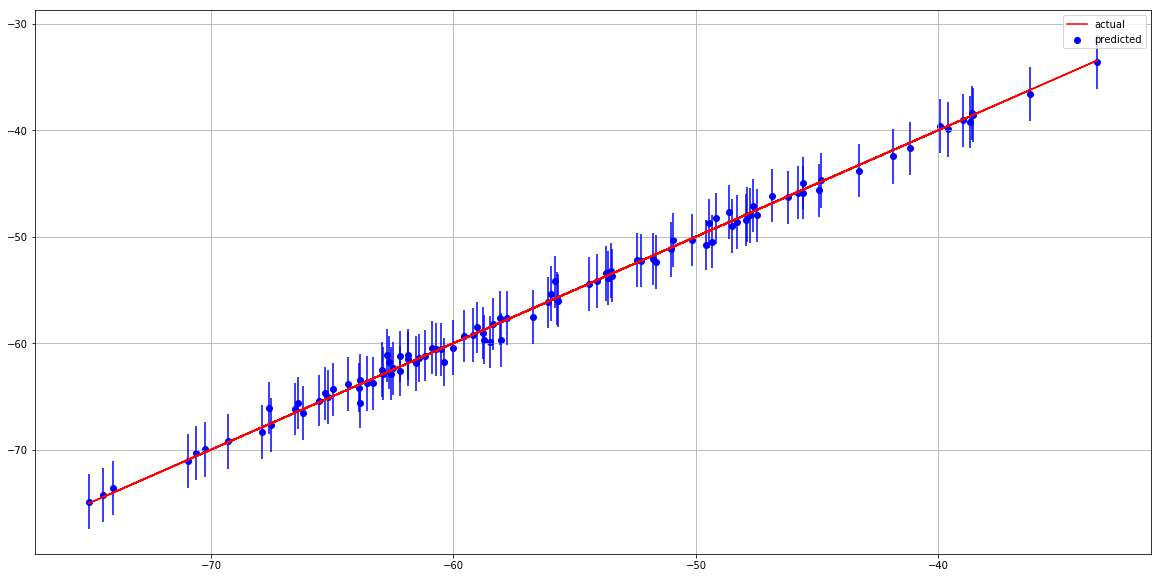

In [14]:
# Predicted vs actual
plt.figure(figsize =(20,10))
plt.plot(outputs, outputs , color = 'red', label ='actual')
plt.scatter(outputs, mean_pos, color = 'blue', label = 'predicted')
plt.vlines(outputs,lower, upper, color = 'blue')
plt.legend()
plt.grid()